In [1]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import re
import sys
GSCALE = 0.001952  # 1.952 mg/digit (±16 g in High-Performance Mode)
Fs = 1600 # 采样率指定1600

def twoComplement16bit(hexData):
    return -(hexData & 0x8000) | (hexData & 0x7FFF)


def process_file(txtFile,csv_directory_path):
    # 读取文件内容并进行数据转换

    # 构建正则表达式
    pattern = re.compile(r"Sensor(\d)_(\d{8})-(\d{6})\.txt")
    match = pattern.search(txtFile)
    if match:
        sensor_index = match.group(1)
        date_part = match.group(2)
        time_part = match.group(3)
    else:
        print("Filename does not match the pattern.")

    # print(f"File: {txtFile}")
    # print("Sensor:",sensor_index)
    # print("Date:", date_part)
    # print("Time:", time_part)
    # print("---")
    with open(txtFile, "r", encoding="utf-8") as file:
        dataBytes = file.read()
        # print(f"文件 '{txtFile}' 共有 {len(dataBytes)} 个字符.")
        csvFile = "/csvData%s_%s-%s.csv" % (sensor_index, date_part,time_part)  # 定义csv文件
        csvFilePath = csv_directory_path + csvFile
        # print(csvFilePath)

        if not os.path.exists(csvFilePath):
            with open(csvFilePath, "w", newline="") as fd:
                writer = csv.writer(fd)
                for i in range(0, len(dataBytes), 12):
                    dataX = (dataBytes[i + 2 : i + 4] + dataBytes[i : i + 2])  # 将X轴数据的MSB和LSB组合在一起
                    dataY = (dataBytes[i + 6 : i + 8] + dataBytes[i + 4 : i + 6])  # 将Y轴数据的MSB和LSB组合在一起
                    dataZ = (dataBytes[i + 10 : i + 12] + dataBytes[i + 8 : i + 10])  # 将Z轴数据的MSB和LSB组合在一起

                    if len(dataX) > 0 and len(dataY) > 0 and len(dataZ) > 0:
                        dataX = twoComplement16bit(int(dataX, 16)) >> 2  # 转换X轴的二补码数据
                        dataY = twoComplement16bit(int(dataY, 16)) >> 2  # 转换Y轴的二补码数据
                        dataZ = twoComplement16bit(int(dataZ, 16)) >> 2  # 转换Z轴的二补码数据

                        writer.writerow([dataX, dataY, dataZ])
                # print("csv数据保存成功")

def main():
    # 指定数据集文件夹路径
    data_directory = './data'

    # 遍历数据集文件夹下的所有时间文件夹
    for time_directory in os.listdir(data_directory):
        # 构建时间文件夹的完整路径
        time_directory_path = os.path.join(data_directory, time_directory)

        # 检查路径是否为目录
        if os.path.isdir(time_directory_path):

            csv_directory_path = "./csv_data/"+time_directory
            if not os.path.exists(csv_directory_path):
                os.makedirs(csv_directory_path)
                print(f"Created directory: {csv_directory_path}")
                
            # 遍历目录下的所有文件和子目录
            for root, dirs, files in os.walk(time_directory_path):
                # print(f"{root},{dirs},{files}")
                for file_name in files:
                    # 构建文件的完整路径
                    file_path = os.path.join(root, file_name)
                    # 处理文件
                    process_file(file_path,csv_directory_path)

        
# main()


文件 './SensorData.txt' 共有 192000 个字符.


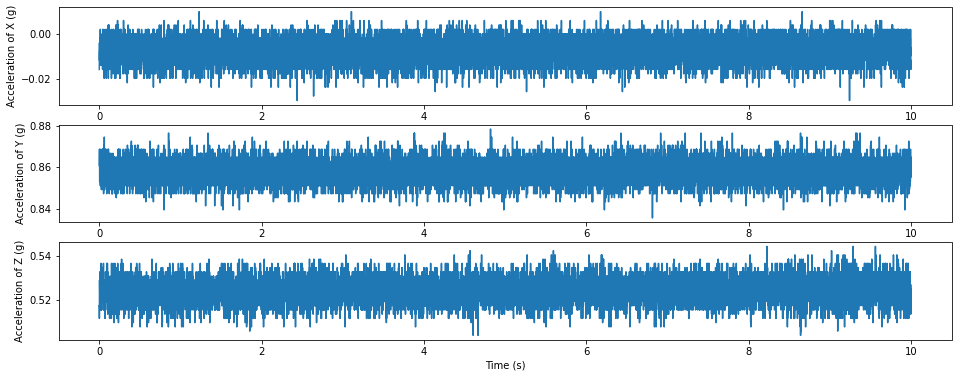

In [10]:
def transfom(txtFile):
    data_list = []
    with open(txtFile, "r", encoding="utf-8") as file:
        dataBytes = file.read()
        print(f"文件 '{txtFile}' 共有 {len(dataBytes)} 个字符.")
        Fs = 1600 # 采样率指定1600
        for i in range(0, len(dataBytes), 12):
            dataX = (dataBytes[i + 2 : i + 4] + dataBytes[i : i + 2])  # 将X轴数据的MSB和LSB组合在一起
            dataY = (dataBytes[i + 6 : i + 8] + dataBytes[i + 4 : i + 6])  # 将Y轴数据的MSB和LSB组合在一起
            dataZ = (dataBytes[i + 10 : i + 12] + dataBytes[i + 8 : i + 10])  # 将Z轴数据的MSB和LSB组合在一起

            if len(dataX) > 0 and len(dataY) > 0 and len(dataZ) > 0:
                dataX = twoComplement16bit(int(dataX, 16)) >> 2  # 转换X轴的二补码数据
                dataY = twoComplement16bit(int(dataY, 16)) >> 2  # 转换Y轴的二补码数据
                dataZ = twoComplement16bit(int(dataZ, 16)) >> 2  # 转换Z轴的二补码数据

                data_list.append([dataX, dataY, dataZ])
    
    
    plot_data(np.array(data_list))
    
def plot_data(csvFile):
    # 可视化数据
    # accData = np.genfromtxt(csvFile, delimiter=",")
    accData = csvFile
    t = np.arange(accData.shape[0]) / Fs
    fig1, ax = plt.subplots(3, 1, dpi=72, figsize=(16, 6))
    ax[0].plot(t, accData[:, 0] * GSCALE)
    ax[1].plot(t, accData[:, 1] * GSCALE)
    ax[2].plot(t, accData[:, 2] * GSCALE)
    # 添加标题
    ax[0].set_ylabel("Acceleration of X (g)")
    ax[1].set_ylabel("Acceleration of Y (g)")
    ax[2].set_ylabel("Acceleration of Z (g)")
    ax[2].set_xlabel("Time (s)")
    plt.show()
# dir_path = './csv_data/'
# file_name = 'csvData0_20240403-094308.csv'
transfom('./SensorData.txt')

In [11]:
txtFile = './SensorData.txt'
with open(txtFile, "r", encoding="utf-8") as file:
    dataBytes = file.read()
    print(f"文件 '{txtFile}' 共有 {len(dataBytes)} 个字符.")
    Fs = 1600 # 采样率指定1600
    csvFile = "csvData%s_%s-%s.csv" % (sensor_index, date_part,time_part)  # 定义csv文件
    if not os.path.exists(csvFile):
        with open(csvFile, "w", newline="") as fd:
            writer = csv.writer(fd)
            for i in range(0, len(dataBytes), 12):
                dataX = (dataBytes[i + 2 : i + 4] + dataBytes[i : i + 2])  # 将X轴数据的MSB和LSB组合在一起
                dataY = (dataBytes[i + 6 : i + 8] + dataBytes[i + 4 : i + 6])  # 将Y轴数据的MSB和LSB组合在一起
                dataZ = (dataBytes[i + 10 : i + 12] + dataBytes[i + 8 : i + 10])  # 将Z轴数据的MSB和LSB组合在一起

                if len(dataX) > 0 and len(dataY) > 0 and len(dataZ) > 0:
                    dataX = twoComplement16bit(int(dataX, 16)) >> 2  # 转换X轴的二补码数据
                    dataY = twoComplement16bit(int(dataY, 16)) >> 2  # 转换Y轴的二补码数据
                    dataZ = twoComplement16bit(int(dataZ, 16)) >> 2  # 转换Z轴的二补码数据

                    writer.writerow([dataX, dataY, dataZ])
            print("csv数据保存成功")

文件 './SensorData.txt' 共有 192000 个字符.


NameError: name 'sensor_index' is not defined